In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [34]:
df = pd.read_csv(r'cleaned_data.csv')
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,avg salary,Company Name Text,Job State,same state,age of company,python_yn,R_yn,aws_yn,excel_yn,spark_yn
0,Data Scientist,53-91,"Data Scientist\r\nLocation: Albuquerque, NM\r\...",3.8,Tecolote Research\r\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,72.0,Tecolote Research,NM,0,49,1,0,0,1,0
1,Healthcare Data Scientist,63-112,What You Will Do:\r\n\r\nI. General Summary\r\...,3.4,University of Maryland Medical System\r\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,87.5,University of Maryland Medical System,MD,0,38,1,0,0,0,0
2,Data Scientist,80-90,"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\r\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,85.0,KnowBe4,FL,1,12,1,0,0,1,1
3,Data Scientist,56-97,*Organization and Job ID**\r\nJob ID: 310709\r...,3.8,PNNL\r\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,76.5,PNNL,WA,1,57,1,0,0,0,0
4,Data Scientist,86-143,Data Scientist\r\nAffinity Solutions / Marketi...,2.9,Affinity Solutions\r\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,114.5,Affinity Solutions,NY,1,24,1,0,0,1,0


In [35]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'Company Name Text', 'Job State', 'same state', 'age of company',
       'python_yn', 'R_yn', 'aws_yn', 'excel_yn', 'spark_yn'],
      dtype='object')

# Additional Feature Engineering leftover from Data Cleaning Phase

In [36]:
'''Creating a function to simplify the title based on role and the seniorirty of the role'''

def title_simplifier(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'
    
def seniority(title):
    if 'sr' in title.lower() or 'sr.' in title.lower() or 'senior' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower() or 'junior' in title.lower():
        return 'junior'
    else:
        return 'na'

In [37]:
df['role_simp'] = df['Job Title'].apply(lambda x:title_simplifier(x))

In [38]:
df['role_simp'].value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: role_simp, dtype: int64

In [39]:
df['seniority'] = df['Job Title'].apply(lambda x:seniority(x))

In [40]:
df['seniority'].value_counts()

na        519
senior    220
junior      3
Name: seniority, dtype: int64

In [41]:
'''Add a column for length of job description and see if legth of job description has a correlation to salary'''

df['desc_length'] = df['Job Description'].apply(lambda x:len(x.split(' ')))
df['desc_length']

0      337
1      636
2      460
3      489
4      358
      ... 
737    829
738    845
739    399
740    203
741    495
Name: desc_length, Length: 742, dtype: int64

In [42]:
'''Add a column indicating number of competitor orgs instead of list of competitor orgs which is not useful for ML algos'''

df['num_competitors'] = df['Competitors'].apply(lambda x:x if x=='-1' else len(x.split(',')))
df['num_competitors'].value_counts()

-1    460
3     228
2      41
1      12
4       1
Name: num_competitors, dtype: int64

In [43]:
'''Convert hourly wage to annual wages - just multiply by 2000 to get approx annual wage but since we divide by 1000 alreayd we just need to multiply by 2'''
df['min salary'] = df.apply(lambda x:x['min salary']*2 if x['Hourly']==1 else x['min salary'], axis=1)
df['max salary'] = df.apply(lambda x:x['max salary']*2 if x['Hourly']==1 else x['max salary'],axis=1)


In [44]:
df['avg salary'] = (df['min salary'] + df['max salary'])/2

In [45]:
df[['min salary', 'max salary', 'avg salary']]

,min salary,max salary,avg salary
0,53,91,72.0
1,63,112,87.5
2,80,90,85.0
3,56,97,76.5
4,86,143,114.5
...,...,...,...
737,58,111,84.5
738,72,133,102.5
739,56,91,73.5
740,95,160,127.5


# EDA

In [46]:
df.describe()

,Rating,Founded,Hourly,Employer Provided,min salary,max salary,avg salary,same state,age of company,python_yn,R_yn,aws_yn,excel_yn,spark_yn,desc_length
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,101.434636,0.557951,48.456873,0.528302,0.002695,0.237197,0.522911,0.225067,511.285714
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,37.546122,0.496965,53.900445,0.499535,0.051882,0.425651,0.499812,0.417908,208.681464
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,15.500000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,365.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,26.000000,1.000000,0.000000,0.000000,1.000000,0.000000,492.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,61.000000,1.000000,0.000000,0.000000,1.000000,0.000000,629.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,278.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1536.000000


### Histograms for numerical features to check if all are Normally distributed or not (ML models, especially regression models prefer normally distribuetd data)

C:\Users\Atul\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating'>

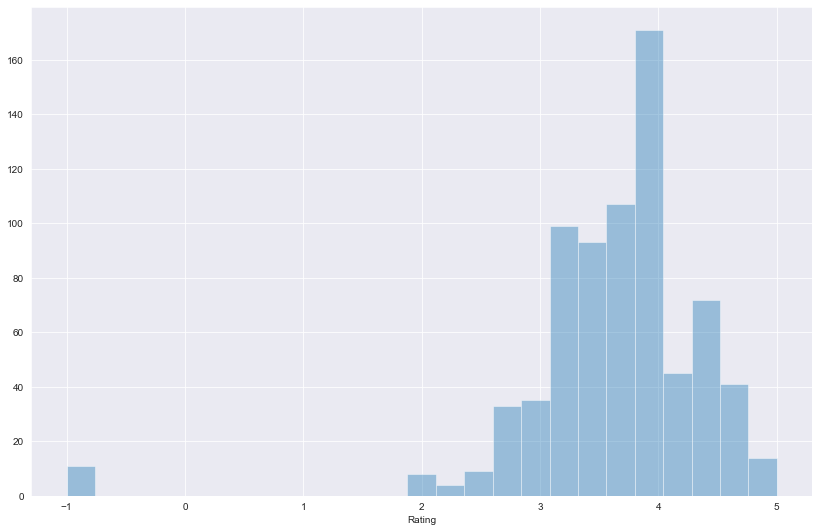

In [47]:
'''Create histograms for relevant features'''

plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.distplot(df['Rating'], kde=False, bins=25)

<AxesSubplot:xlabel='avg salary'>

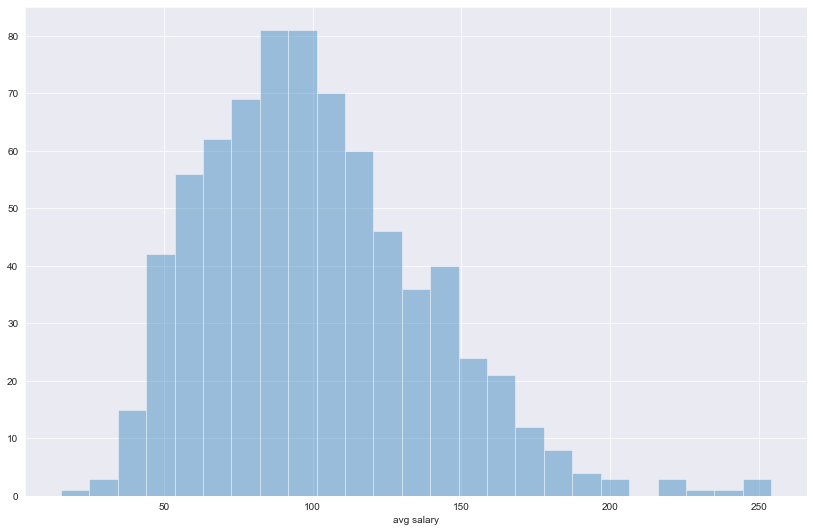

In [48]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.distplot(df['avg salary'], kde=False, bins=25)

<AxesSubplot:xlabel='avg salary'>

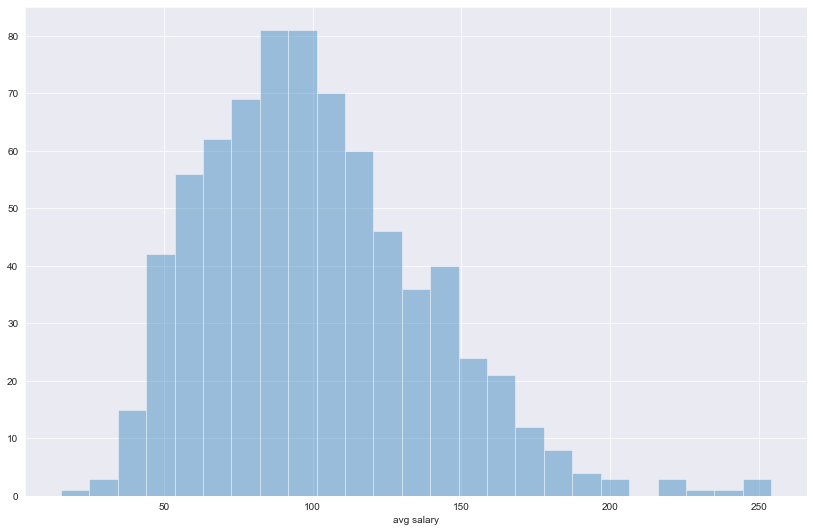

In [49]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.distplot(df['avg salary'], kde=False, bins=25)

<AxesSubplot:xlabel='age of company'>

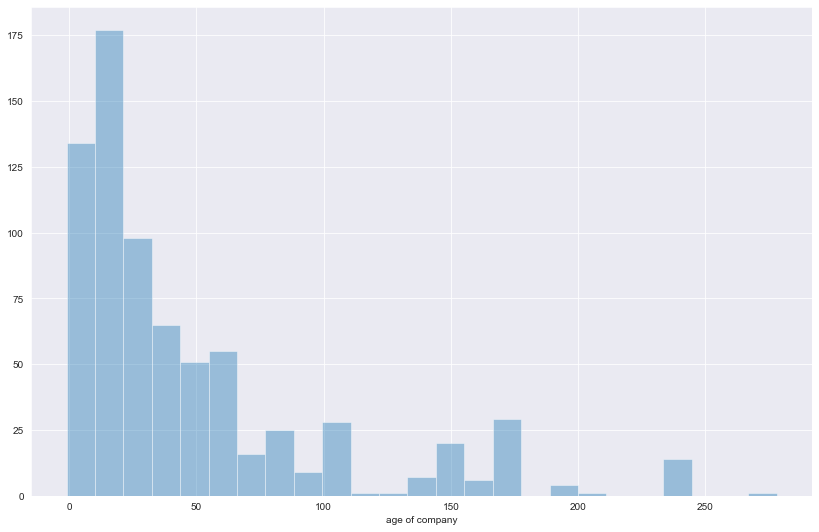

In [50]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.distplot(df['age of company'], kde=False, bins=25)

#not Normally distirbuted and hence regressors wont react well to it. First normalize this variables before feeding to ML model.

<AxesSubplot:xlabel='desc_length'>

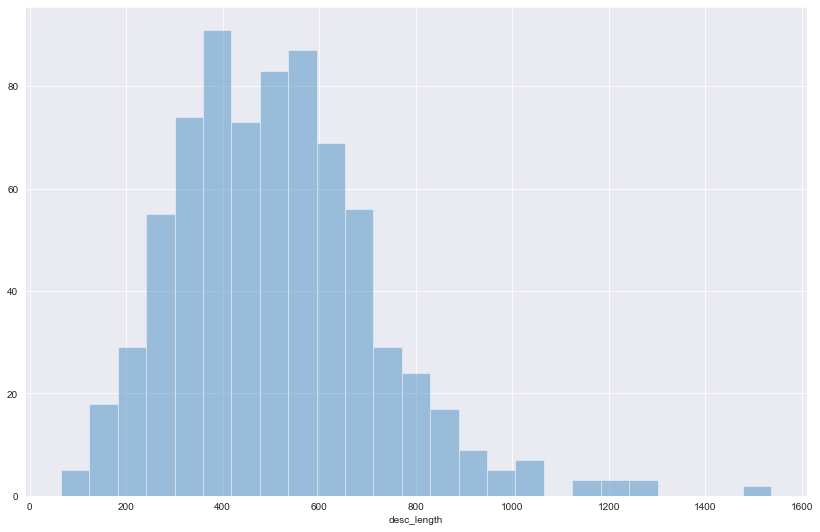

In [51]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.distplot(df['desc_length'], kde=False, bins=25)

### Boxplots

<AxesSubplot:xlabel='age of company'>

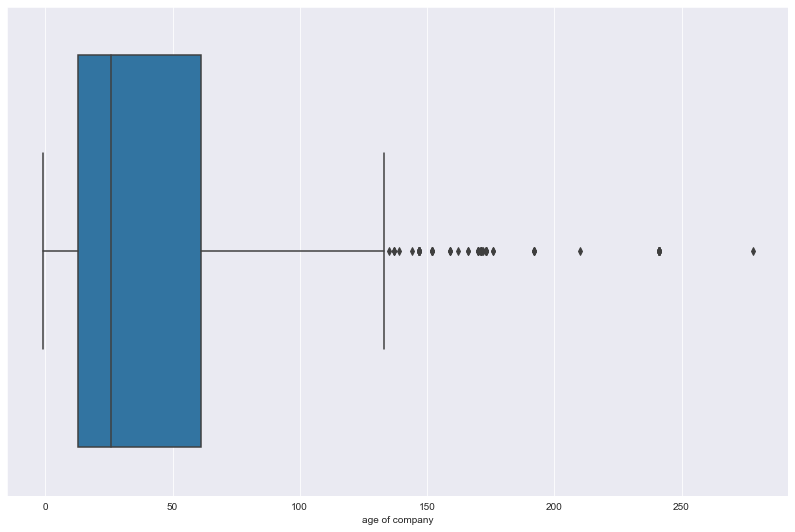

In [53]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.boxplot(x = df['age of company'])

Text(0.5, 0, 'Average Salary')

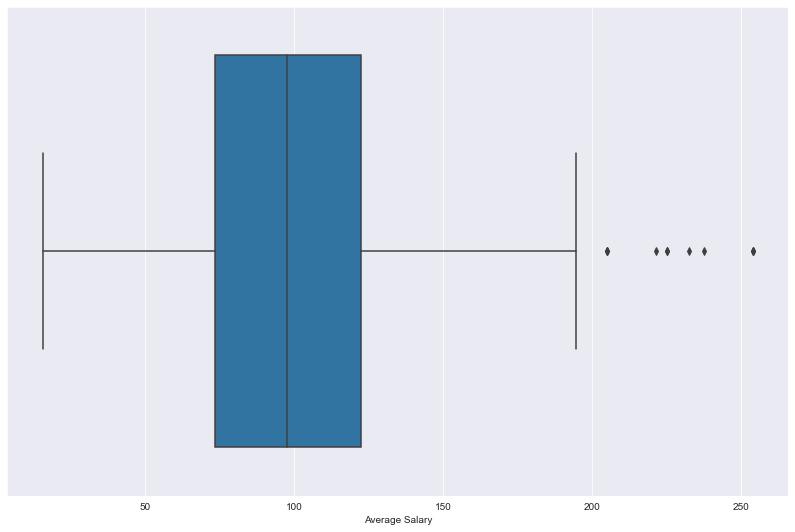

In [56]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.boxplot(x = df['avg salary'])
plt.xlabel('Average Salary')

<AxesSubplot:xlabel='Rating'>

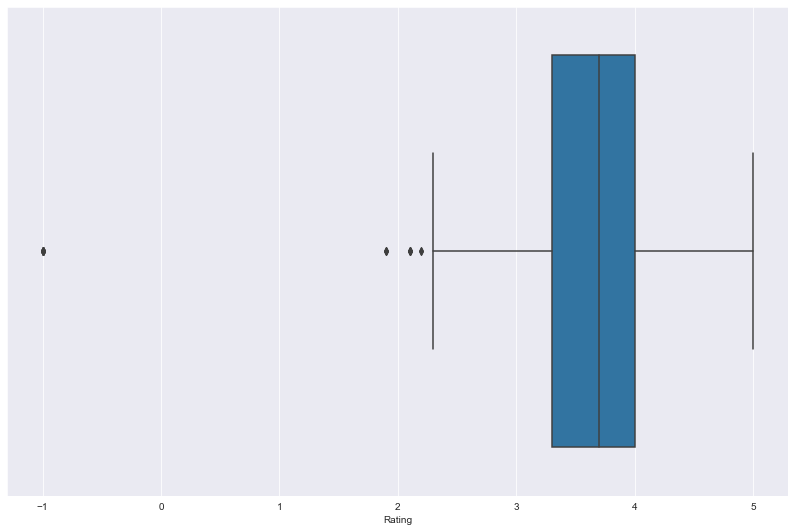

In [57]:
plt.figure(figsize=(14,9))
sns.set_style('darkgrid')
sns.boxplot(x = df['Rating'])

### Studying degree of correlation between variables

<AxesSubplot:>

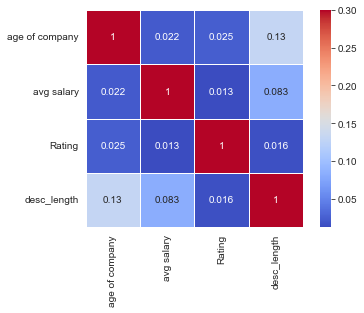

In [73]:
sns.heatmap(df[['age of company','avg salary', 'Rating', 'desc_length']].corr(),square=True,linewidths=.5,annot=True,vmax=0.3,cmap="coolwarm",cbar=True,xticklabels=['age of company','avg salary', 'Rating', 'desc_length'],yticklabels=['age of company','avg salary', 'Rating', 'desc_length']) 



### See distibution of categorical variables

In [74]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Hourly', 'Employer Provided', 'min salary', 'max salary', 'avg salary',
       'Company Name Text', 'Job State', 'same state', 'age of company',
       'python_yn', 'R_yn', 'aws_yn', 'excel_yn', 'spark_yn', 'role_simp',
       'seniority', 'desc_length', 'num_competitors'],
      dtype='object')

In [ ]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Job State', 'same state',
       'python_yn', 'R_yn', 'aws_yn', 'excel_yn', 'spark_yn', 'role_simp',
       'seniority']]

for cat in df_cat.columns:
    ax = sns.countplot(x=df[cat])
    plt.xticks(rotation=90)
    plt.tick_params(bottom=True, left=True)
    ax.bar_label(ax.containers[0])
    plt.show()

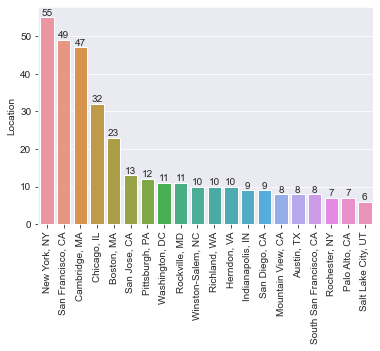

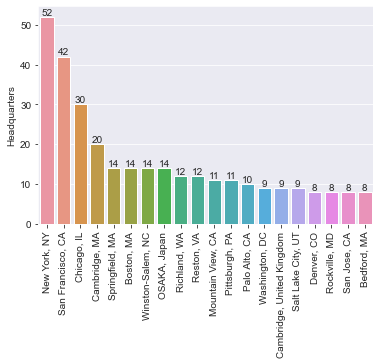

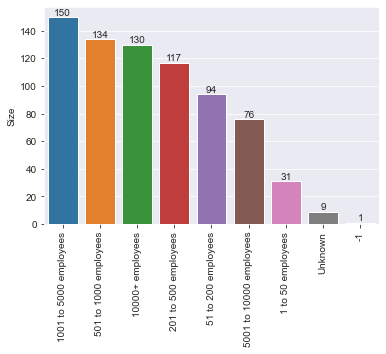

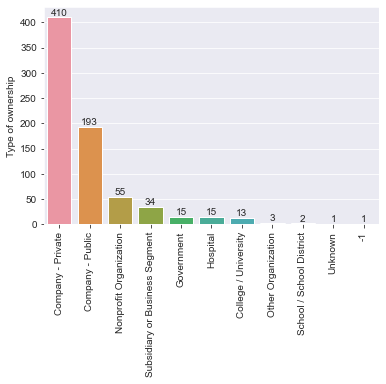

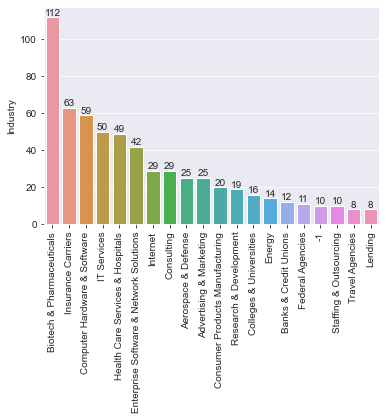

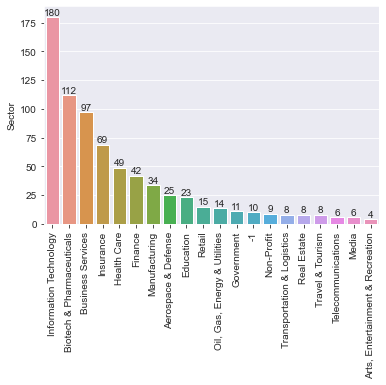

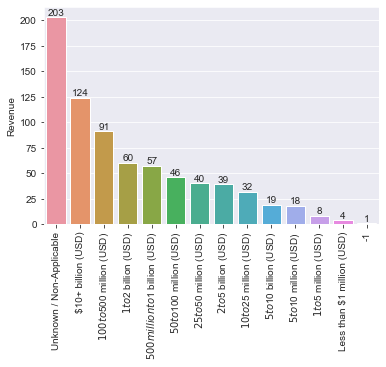

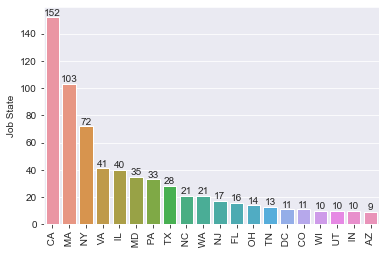

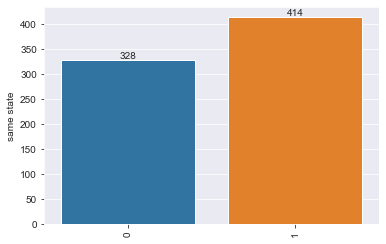

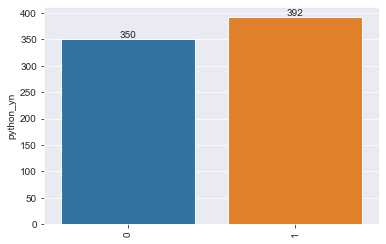

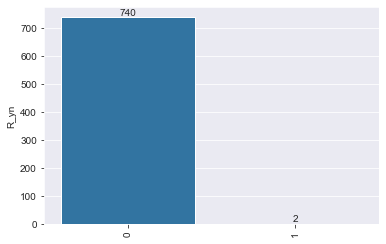

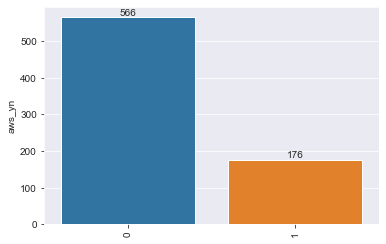

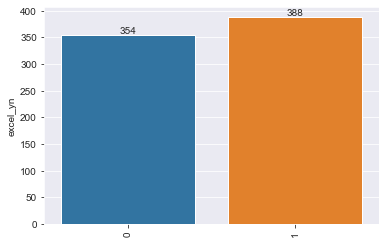

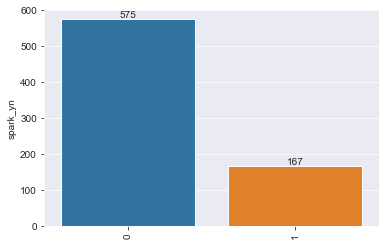

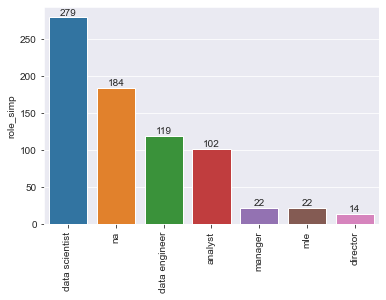

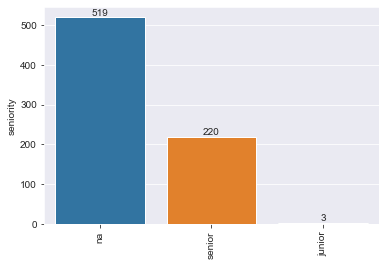

In [91]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue','Job State', 'same state',
       'python_yn', 'R_yn', 'aws_yn', 'excel_yn', 'spark_yn', 'role_simp',
       'seniority']]

for cat in df_cat.columns:
    if len(df[cat].value_counts())>20:
        cat_num = df[cat].value_counts(ascending=False)[:20]
    else:
        cat_num = df[cat].value_counts()
    ax = sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.tick_params(bottom=True, left=True)
    ax.bar_label(ax.containers[0])
    plt.show()

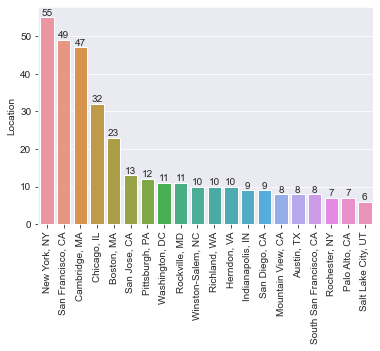

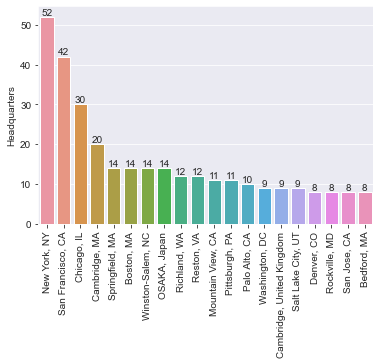

In [90]:
df_cat = df[['Location', 'Headquarters']]

for cat in df_cat.columns:
    cat_num = df[cat].value_counts(ascending=False)[:20]
    ax = sns.barplot(x=cat_num.index, y=cat_num)
    plt.xticks(rotation=90)
    plt.tick_params(bottom=True, left=True)
    ax.bar_label(ax.containers[0])
    plt.show()

In [93]:
pd.pivot_table(df,index=['role_simp','seniority'],values='avg salary')

avg salary
role_simp      seniority            
analyst        junior      53.250000
               na          61.308219
               senior      80.092593
data engineer  na          96.701220
               senior     124.689189
data scientist junior     106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          78.500000
               senior     109.061404

In [100]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)
pd.pivot_table(df, index=['Job State','role_simp'], values = 'avg salary', aggfunc='count').sort_values('Job State', ascending=False)

avg salary
Job State role_simp                 
 WI       na                       4
          data scientist           3
          analyst                  3
 WA       na                       1
          data scientist          17
          analyst                  3
 VA       na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
 UT       data engineer            3
          analyst                  4
          data scientist           3
 TX       na                       7
          data scientist          13
          data engineer            8
 TN       data scientist           1
          data engineer           10
          analyst                  2
 SC       na                       1
 RI       analyst                  1
 PA       manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
 OR       data scientist           3
          data engineer            1
 OH       na                       3
          data scientist           7
          analyst                  4
 NY       na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
 NM       data scientist           3
 NJ       data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
 NE       na                       4
 NC       na                      12
          data scientist           3
          data engineer            6
 MO       na                       3
          manager                  1
          data scientist           3
          analyst                  2
 MN       data engineer            1
          analyst                  1
 MI       manager                  2
          data scientist           4
 MD       na                      16
          data scientist          13
          data engineer            3
          analyst                  3
 MA       na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
 LA       analyst                  1
          data engineer            2
          na                       1
 KY       na                       4
          data scientist           2
 KS       mle                      3
 IN       na                       4
          data scientist           2
          data engineer            4
 IL       analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
 ID       analyst                  2
 IA       analyst                  2
          data engineer            3
 GA       data scientist           3
          na                       3
 FL       data scientist           7
          data engineer            3
          analyst                  6
 DE       na                       6
 DC       data scientist           5
          data engineer            4
          analyst                  2
 CT       na                       3
          data scientist           2
 CO       mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
 CA       na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [102]:
pd.options.display.max_rows
pd.set_option('display.max_rows',None)
pd.pivot_table(df[df['role_simp']=='data scientist'], index='Job State', values = 'avg salary').sort_values('avg salary', ascending=False)

,avg salary
Job State,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [103]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_competitors', 'Job State', 'Hourly',
       'python_yn', 'R_yn', 'aws_yn', 'excel_yn', 'spark_yn']]

for i in df_pivots.columns:
    print(i)
    print(pd.pivot_table(df,index=i,values='avg salary').sort_values('avg salary', ascending=False))
    
#can see Media industry pays well
#can see jobs with python,r,excel,aws,spark in their desciption pay better
#companies in high or low revenues pay better than mid revenue companies
#public companies pay best

Rating
        avg salary
Rating            
-1.0    136.181818
 5.0    134.700000
 2.5    120.000000
 4.5    117.714286
 4.1    116.368421
 3.9    113.071429
 2.6    109.083333
 4.4    108.606061
 4.0    107.170213
 3.2    106.928571
 3.7    105.680328
 3.5    104.897959
 4.7    103.983871
 3.3    103.897436
 4.3    102.468750
 4.2    100.442308
 2.2     97.750000
 3.8     97.418033
 4.6     97.250000
 2.1     95.900000
 3.4     93.465909
 3.6     89.945652
 1.9     87.500000
 3.1     86.580000
 3.0     85.588235
 2.7     85.178571
 2.8     83.928571
 2.3     81.500000
 2.9     81.138889
 4.8     80.277778
 2.4     60.214286
Industry
                                          avg salary
Industry                                            
Other Retail Stores                       163.500000
Motion Picture Production & Distribution  146.000000
Financial Analytics & Research            145.125000
Health, Beauty, & Fitness                 139.500000
Telecommunications Services            

In [108]:
pd.pivot_table(df, index='Revenue', columns = 'python_yn', values = 'avg salary', aggfunc='count')
#which revenue range companies pay higher if know python

python_yn,0,1
Revenue,,
$1 to $2 billion (USD),16.0,44.0
$1 to $5 million (USD),1.0,7.0
$10 to $25 million (USD),16.0,16.0
$10+ billion (USD),66.0,58.0
$100 to $500 million (USD),47.0,44.0
$2 to $5 billion (USD),17.0,22.0
$25 to $50 million (USD),24.0,16.0
$5 to $10 billion (USD),9.0,10.0
$5 to $10 million (USD),9.0,9.0


In [109]:
df.to_csv('eda-cleaned-data.csv')